In [36]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data[:,2:] # 군집의 결과를 2차원 평면으로 시각화 위해 2개의 특성값만 선택
y = iris.target

In [5]:
import warnings
warnings.filterwarnings (action='ignore')

# 최적의 K 찾기
 - KMeans 객체의 inertia 속성 이용
   >- inertia : 각 데이터에서 할당된 클러스터 중심까지의 제곱거리 합

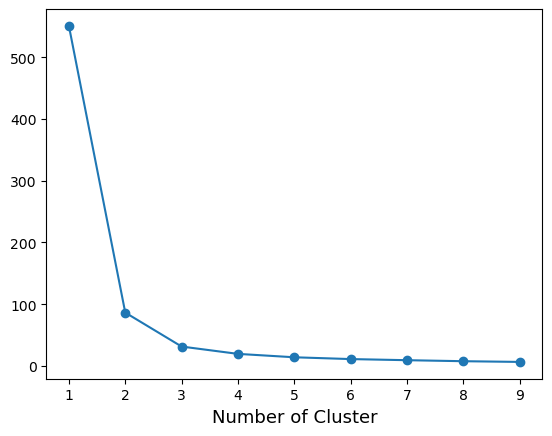

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_arr = [ ]
k_range = range(1,10)

for k in k_range:
    kmean = KMeans(n_clusters=k, random_state=20)
    kmean.fit(x)
    inertia = kmean.inertia_
    inertia_arr.append(inertia)
    
# elbow 메소드 그래프 그리기
plt.plot(k_range, inertia_arr,'o-')
plt.xlabel('Number of Cluster',fontsize=13)

# 최적의 k는 3

# K-Means clustering 하기

[1 1 1 1 1 1 1 1 1 1]
cluster-0: 52
cluster-1: 50
cluster-2: 48


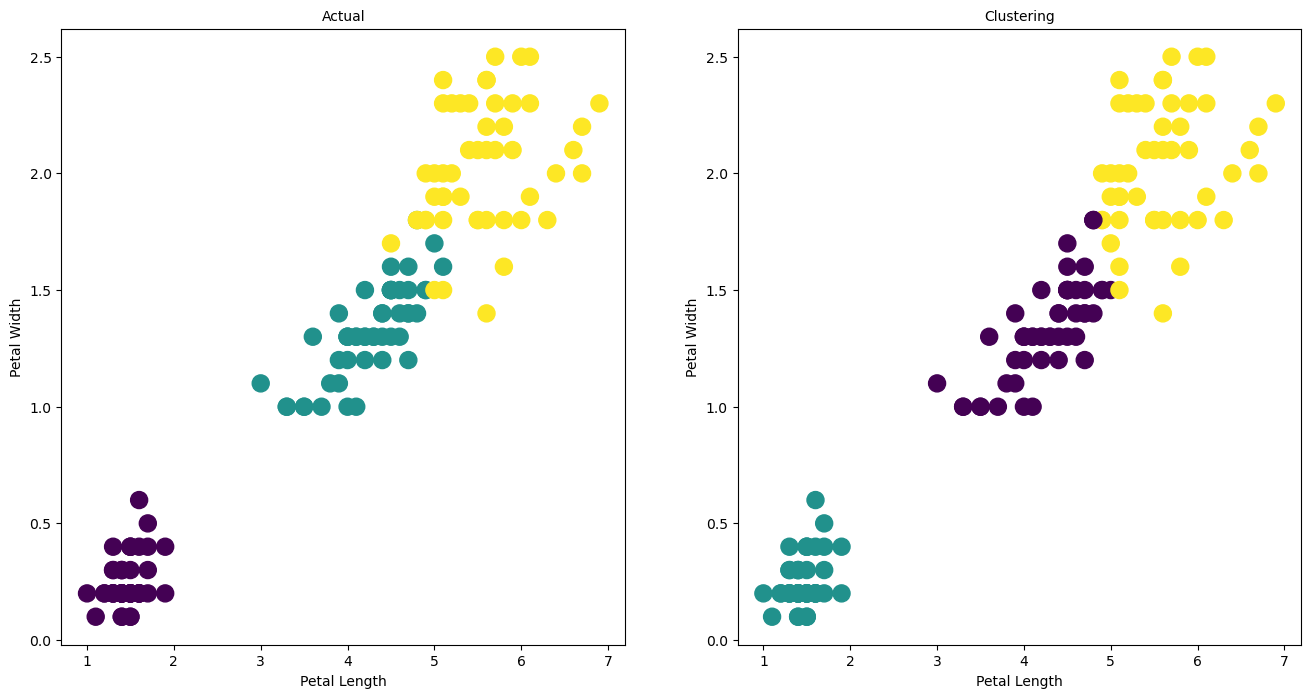

In [26]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=3, random_state=10)
kmeans.fit(x)

cluster_num = kmeans.labels_
print(cluster_num[:10]) # 각각의 데이터가 군집 0,1,2에 배정된 결과들의 모임 = label
print('cluster-0:', len(cluster_num[cluster_num==0]))
print('cluster-1:', len(cluster_num[cluster_num==1]))
print('cluster-2:', len(cluster_num[cluster_num==2]))

fig, axes = plt.subplots(1, 2, figsize = (16,8))
# 붓꽃의 정답 그래프
axes[0].scatter(x[:,0],x[:,1],c=y, s = 150) # c는 색깔 각 데이터의 클래스 값 0,1,2 로 색깔 지정, s 는 산점도 크기 
axes[0].set_xlabel('Petal Length', fontsize =10 )
axes[0].set_ylabel('Petal Width', fontsize =10 )
axes[0].set_title('Actual', fontsize =10 )

# K-means clustering 을 통해 군집된 결과 그래프
axes[1].scatter(x[:,0],x[:,1],c=cluster_num, s = 150)
axes[1].set_xlabel('Petal Length', fontsize =10 )
axes[1].set_ylabel('Petal Width', fontsize =10 )
axes[1].set_title('Clustering', fontsize =10 )

plt.show()

# 군집평가

In [31]:
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['cluster'] = cluster_num
score_sample = silhouette_samples(iris.data, kmeans.labels_)
print(score_sample.shape)

iris_df['silhouette_coef'] = score_sample

average_score = silhouette_score(iris.data, kmeans.labels_)
print(f'실루엣 계수의 평균값:{average_score:.3f}')

group_by_cluster = iris_df.groupby('cluster')['silhouette_coef'].mean()
print(group_by_cluster)
display(iris_df.head())

(150,)
실루엣 계수의 평균값:0.522
cluster
0    0.416037
1    0.790033
2    0.358131
Name: silhouette_coef, dtype: float64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,silhouette_coef
0,5.1,3.5,1.4,0.2,1,0.846985
1,4.9,3.0,1.4,0.2,1,0.807886
2,4.7,3.2,1.3,0.2,1,0.822747
3,4.6,3.1,1.5,0.2,1,0.797255
4,5.0,3.6,1.4,0.2,1,0.843342


# 실루엣 계수를 이용한 군집 개수 최적화 보여주기

In [44]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

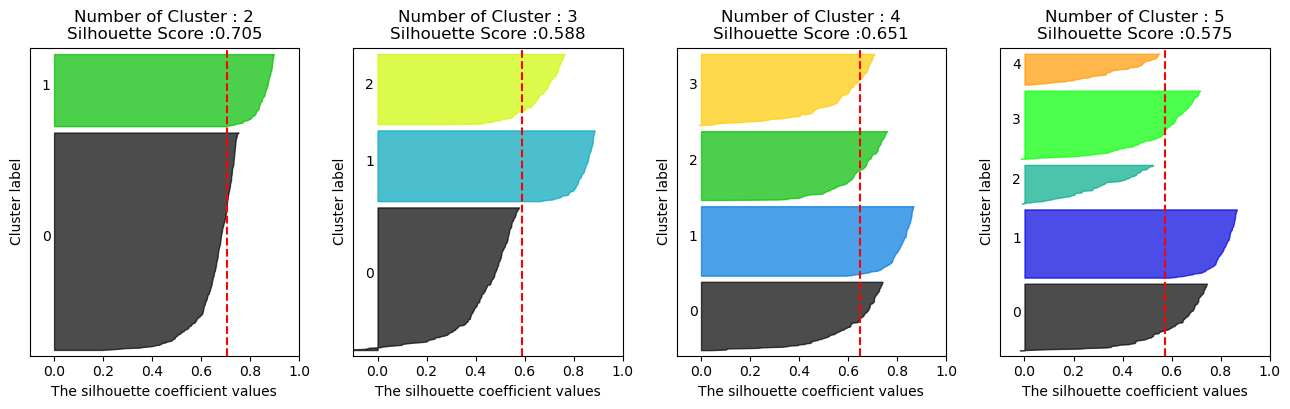

In [34]:
import numpy as np
# make_blob :  clustering 을 위한 임의의 데이터셋 생성
from sklearn.datasets import make_blobs
# 4개의 클러스터 중심 갖는 500개 2차원 데이터 생성
x,y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, shuffle=True, random_state=1)
visualize_silhouette([2,3,4,5], x)
# 4개의 군집이 최적

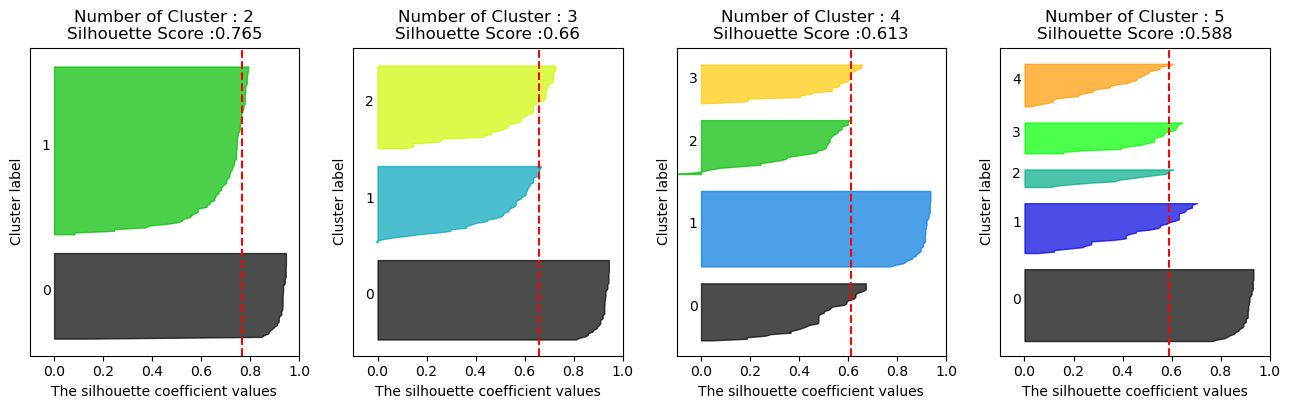

In [37]:
visualize_silhouette([2,3,4,5], x)

[실습] 군집분석을 통한 온라인 쇼핑몰 구매고객 분석
동일 군집에 들어간 사람들은 어떤 특징이 있는지

## 데이터 로딩

In [3]:
import pandas as pd
import numpy as np

retail = pd.read_excel("./데이터셋/online_retail.xlsx")
print(retail.shape)

(525461, 8)


In [4]:
display(retail.head())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
print(retail['Country'].value_counts())

Country
United Kingdom          485852
EIRE                      9670
Germany                   8129
France                    5772
Netherlands               2769
Spain                     1278
Switzerland               1187
Portugal                  1101
Belgium                   1054
Channel Islands            906
Sweden                     902
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
United Arab Emirates       432
Denmark                    428
Norway                     369
Finland                    354
Unspecified                310
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
RSA                        111
Bahrain                    107
Canada                      77
Hong Kong                   76
Thailand                    76


## 데이터 전처리

### 결측치 확인 및 제거

In [6]:
print(retail.isna().sum())

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [7]:
retail = retail.dropna()
print(retail.shape)

(417534, 8)


### 데이터 타입 변경

In [15]:
print(retail.info()) #고객번호를 정수타입으로 변경
retail['Customer ID'] = retail['Customer ID'].astype(int)

<class 'pandas.core.frame.DataFrame'>
Index: 407695 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  int32         
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  int32         
 7   Country      407695 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(3)
memory usage: 24.9+ MB
None


### 취소 주문 데이터 삭제

In [14]:
# 송장번호에서 취소된 주문은 'C'가 앞 글자로 붙어있음
# 취소 주문 데이터 먼저 삭제

#print(retail['Invoice'].str.startswith('C').sum())
print((retail['Quantity'] <= 0).sum())
del_index = retail[retail['Quantity'] <= 0].index
# print(del_index[:5])
retail.drop(del_index, inplace=True)

retail['Invoice'] = retail['Invoice'].astype(int)

0


## 분석용 데이터 준비

## 분석 데이터 탐색

In [16]:
retail_info = pd.DataFrame({'Products': len(retail['StockCode'].value_counts()), # 총 상품개수
                           'Transaction': len(retail['Invoice'].value_counts()), # 총 거래건수
                           'Customers': len(retail['Customer ID'].value_counts()), # 총 고객수
                            'Coutries': len(retail['Country'].value_counts())},
index=['Count'])
print(retail_info)

       Products  Transaction  Customers  Coutries
Count      4017        19215       4314        37


### 분석용 데이터 생성
- 고객별 타겟 마케팅을 위한 고객의 주문 횟수, 총액, 마지막 주문으로부터 기준일까지 경과일 수 추출

#### 주문 금액 컬럼 추가

In [17]:
retail['OrderAmount'] = retail ['Quantity'] * retail['Price']

In [19]:
display(retail.sample(10))

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,OrderAmount
468643,533551,22178,VICTORIAN GLASS HANGING T-LIGHT,6,2010-11-17 17:08:00,1.25,17576,United Kingdom,7.50
241482,512743,21314,SMALL GLASS HEART TRINKET POT,4,2010-06-17 14:43:00,2.10,17799,United Kingdom,8.40
255599,514026,20723,STRAWBERRY CHARLOTTE BAG,10,2010-06-30 11:32:00,0.85,17676,United Kingdom,8.50
98436,498594,22236,CAKE STAND 3 TIER MAGIC GARDEN,1,2010-02-21 15:48:00,12.75,16797,United Kingdom,12.75
488549,535221,22727,ALARM CLOCK BAKELIKE RED,4,2010-11-25 12:21:00,3.75,12748,United Kingdom,15.00
454540,532587,22086,PAPER CHAIN KIT 50'S CHRISTMAS,4,2010-11-12 14:28:00,2.95,15024,United Kingdom,11.80
239254,512539,21211,SET OF 72 SKULL PAPER DOILIES,1,2010-06-16 12:48:00,1.45,13567,United Kingdom,1.45
399164,527507,22667,RECIPE BOX RETROSPOT,3,2010-10-18 12:43:00,2.95,17085,United Kingdom,8.85
477732,534244,22632,HAND WARMER RED RETROSPOT,2,2010-11-22 10:59:00,2.10,16972,United Kingdom,4.20
209582,509601,84212,"ASSORTED FLOWER COLOUR ""LEIS""",6,2010-05-24 16:08:00,0.65,13201,United Kingdom,3.90


#### 개별 고객 정보를 담고 있는 데이터 프레임 생성

In [24]:
customer_df = retail.groupby('Customer ID').agg({"Invoice":'count','OrderAmount':'sum', 'InvoiceDate':'max'}) # 주문횟수, 총 주문금액, 최근주문일
display(customer_df.head())

,Invoice,OrderAmount,InvoiceDate
Customer ID,,,
12346,33,372.86,2010-06-28 13:53:00
12347,71,1323.32,2010-12-07 14:57:00
12348,20,222.16,2010-09-27 14:59:00
12349,102,2671.14,2010-10-28 08:23:00
12351,21,300.93,2010-11-29 15:23:00


In [32]:
#customer Id 인덱스를 컬럼 값으로 변경
#customer_df = customer_df.reset_index()
#컬럼명 변경 invoice => Frequency 주문횟수, InvoiceDate => ElapsedDays 마지막 주문일부터 경과일수
customer_df.rename(columns={'Invoice':'Freq','InvoiceDate':'ElapsedDays'},inplace=True)
# ElapsedDays = 기준일 - 마지막 구매일
customer_df['ElapsedDays'] = pd.to_datetime('2011.09.12') - customer_df['ElapsedDays']
customer_df['ElapsedDays'] = customer_df['ElapsedDays'].apply(lambda x: x.days+1)

In [33]:
display(customer_df.head())

,level_0,index,Customer ID,Freq,OrderAmount,ElapsedDays
0,0,0,12346,33,372.86,441
1,1,1,12347,71,1323.32,279
2,2,2,12348,20,222.16,350
3,3,3,12349,102,2671.14,319
4,4,4,12351,21,300.93,287


## 모델 생성

### 데이터 스케일링

#### 데이터 로그 변환
- Log를 취해주면 큰 숫자를 `같은 비율의 작은 숫자`로 만들어줌.
- 첨도와 왜도가 줄어들면서 정규성이 높아진다.
- 첨도 : 분포의 뾰족한 정도를 측정하는 척도
- 왜도 : 평균에 대한 분포의 비대칭 정도를 나타내는 지표

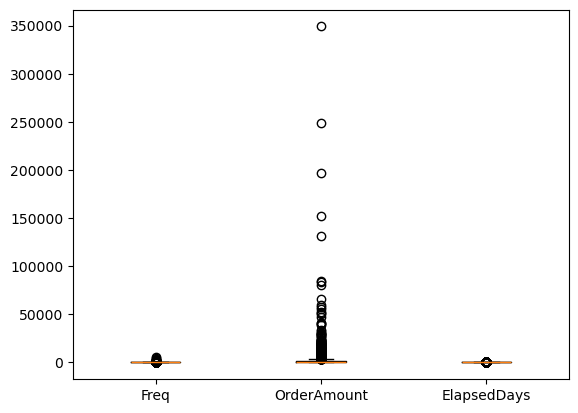

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
plt.boxplot([customer_df['Freq'], customer_df['OrderAmount'], customer_df['ElapsedDays']], sym = 'o')
plt.xticks([1,2,3], ['Freq','OrderAmount','ElapsedDays'])
plt.show()

In [35]:
print(customer_df.describe())

          level_0       index   Customer ID         Freq    OrderAmount  \
count  4314.00000  4314.00000   4314.000000  4314.000000    4314.000000   
mean   2156.50000  2156.50000  15348.880389    94.505100    2047.288659   
std    1245.48886  1245.48886   1700.930104   202.020116    8912.523243   
min       0.00000     0.00000  12346.000000     1.000000       0.000000   
25%    1078.25000  1078.25000  13883.250000    18.000000     307.950000   
50%    2156.50000  2156.50000  15348.500000    44.000000     705.550000   
75%    3234.75000  3234.75000  16833.750000   102.000000    1722.802500   
max    4313.00000  4313.00000  18287.000000  5570.000000  349164.350000   

       ElapsedDays  
count  4314.000000  
mean    367.269819  
std      96.944304  
min     277.000000  
25%     294.000000  
50%     329.000000  
75%     412.000000  
max     650.000000  


In [37]:
customer_df['Freq_log'] = np.log1p(customer_df['Freq'])
customer_df['OrderAmount_log'] = np.log1p(customer_df['OrderAmount'])
customer_df['ElapsedDays_log'] = np.log1p(customer_df['ElapsedDays'])

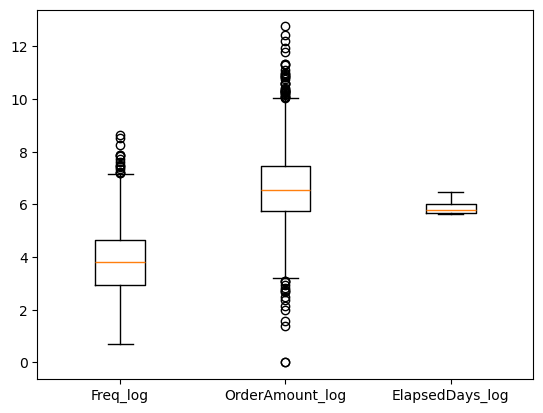

In [38]:
fig, ax = plt.subplots()
plt.boxplot([customer_df['Freq_log'], customer_df['OrderAmount_log'], customer_df['ElapsedDays_log']], sym = 'o')
plt.xticks([1,2,3], ['Freq_log','OrderAmount_log','ElapsedDays_log'])
plt.show()

#### feature 표준화 스케일링

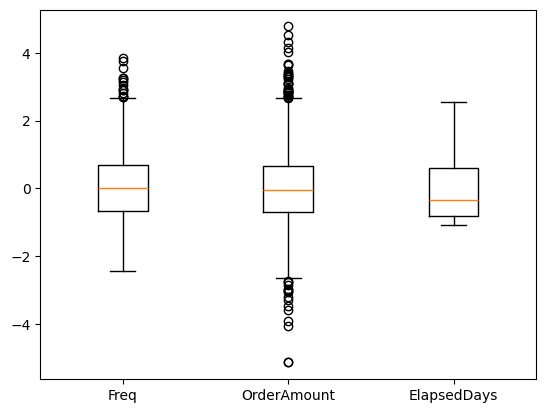

In [39]:
from sklearn.preprocessing import StandardScaler
scaled_data = customer_df[['Freq_log','OrderAmount_log','ElapsedDays_log']]
scaled_data = StandardScaler().fit_transform(scaled_data)
fig, ax = plt.subplots()
ax.boxplot([scaled_data[:,0], scaled_data[:,1], scaled_data[:,2]], sym = 'o')
plt.xticks([1,2,3], ['Freq','OrderAmount','ElapsedDays'])
plt.show()

## 최적의 k 찾기

###  elbow method 이용하기 

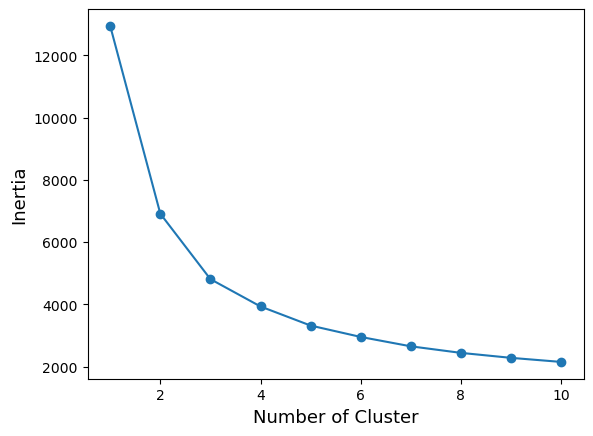

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

inertia_arr = []
k_range = range(1,11)

for k in k_range:
    kmean = KMeans(n_clusters=k, random_state = 20)
    kmean.fit(scaled_data)
    inertia = kmean.inertia_
    inertia_arr.append(inertia)

# Elbow method 그래프 그리기
plt.plot(k_range, inertia_arr, 'o-') 
plt.xlabel('Number of Cluster', fontsize = 13) 
plt.ylabel('Inertia', fontsize = 13)
plt.show()

### 실루엣 계수 이용

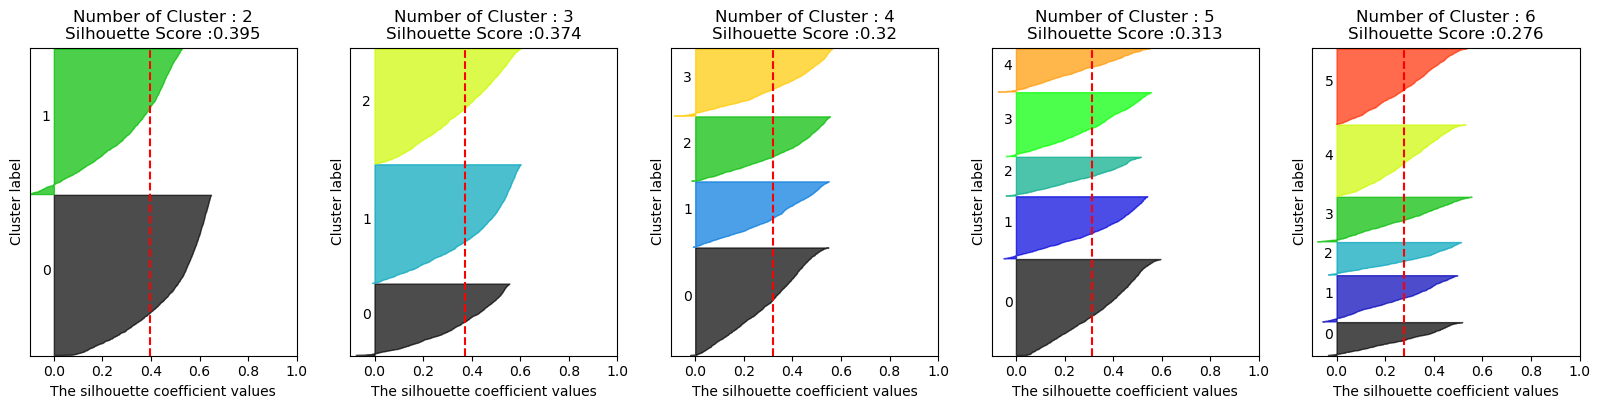

In [45]:
visualize_silhouette([2,3,4,5,6], scaled_data)

### 최적 k를 이용한 군집분석

In [56]:
model = KMeans(n_clusters=3)
model.fit(scaled_data)
cluster_num = model.labels_

In [57]:
customer_df['cluster'] = cluster_num
display(customer_df.head())

,level_0,index,Customer ID,Freq,OrderAmount,ElapsedDays,Freq_log,OrderAmount_log,ElapsedDays_log,cluster
0,0,0,12346,33,372.86,441,3.526361,5.923881,6.091310,2
1,1,1,12347,71,1323.32,279,4.276666,7.188654,5.634790,1
2,2,2,12348,20,222.16,350,3.044522,5.407889,5.860786,0
3,3,3,12349,102,2671.14,319,4.634729,7.890635,5.768321,1
4,4,4,12351,21,300.93,287,3.091042,5.710195,5.662960,0


In [48]:
scaled_data[:5]

array([[-0.19943631, -0.53511151,  0.90078364],
       [ 0.39484037,  0.44738866, -1.03578823],
       [-0.58107433, -0.93594439, -0.07710421],
       [ 0.6784427 ,  0.99270073, -0.46934431],
       [-0.54422833, -0.70110708, -0.91628658]])

## 군집 결과 의미 해석

### 군집 결과 산점도로 시각화

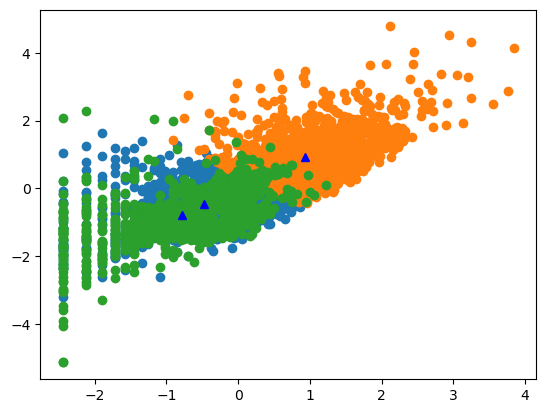

In [58]:
for i in range(3): #3=군집의 개수
    plt.scatter(scaled_data[cluster_num==i,0], scaled_data[cluster_num==i,1],label='cluster-' + str(i))
plt.plot(model.cluster_centers_[:,0], model.cluster_centers_[:,1],'b^',label='cluster_center')
plt.legend
plt.show()

In [60]:
customer_df_cluster = customer_df.drop(['Customer ID','Freq_log','OrderAmount_log','ElapsedDays_log'], axis=1)
display(customer_df_cluster.head())

,level_0,index,Freq,OrderAmount,ElapsedDays,cluster
0,0,0,33,372.86,441,2
1,1,1,71,1323.32,279,1
2,2,2,20,222.16,350,0
3,3,3,102,2671.14,319,1
4,4,4,21,300.93,287,0


### 구매 1회당 평균 구매비용

In [61]:
customer_df_cluster['OrderAmountAvg'] = customer_df_cluster['OrderAmount']/customer_df_cluster['Freq']

In [63]:
group_by_cluster = customer_df_cluster.groupby('cluster')
group_by_cluster['Freq'].count()
print(group_by_cluster.mean())

             level_0        index        Freq  OrderAmount  ElapsedDays  \
cluster                                                                   
0        2173.666257  2173.666257   30.452366   532.085286   327.366933   
1        2107.144305  2107.144305  199.409660  4486.260053   313.970781   
2        2210.797030  2210.797030   23.503960   438.457826   520.046535   

         OrderAmountAvg  
cluster                  
0             35.995933  
1             28.864662  
2             51.866412  
